# 操作已有图像

## 打开、缩放 thumbnail(w, h)、保存

In [14]:
from PIL import Image

base_path = './img/'

# 打开图像
img = Image.open(base_path + "oxygen.png")

# 尺寸
w, h = img.size
print(f'宽：{w}, 高：{h}')

# 缩放
img.thumbnail((w//2, h//2))

# 保存
img.save(base_path + "oxygen_nail.png",'png')


宽：629, 高：95


## 查看像素值 img.getpixel((50, 50))

In [38]:
from PIL import Image,ImageFilter

base_path = './img/'

# 打开图像
img = Image.open(base_path + "oxygen.png")
# 查看指定像素点的像素值
img.getpixel((50, 50))

(117, 117, 117, 255)

In [18]:
help(img.getpixel)

Help on method getpixel in module PIL.Image:

getpixel(xy) method of PIL.PngImagePlugin.PngImageFile instance
    Returns the pixel value at a given position.
    
    :param xy: The coordinate, given as (x, y). See
       :ref:`coordinate-system`.
    :returns: The pixel value.  If the image is a multi-layer image,
       this method returns a tuple.



## 旋转 img.rotate(90)

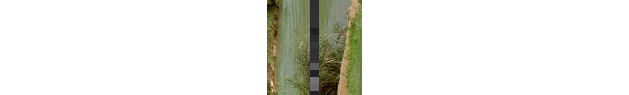

In [31]:
from PIL import Image
base_path = './img/'

# 打开图像
img = Image.open(base_path + "oxygen.png")

# 旋转
img.rotate(90)
# print(list(filter(lambda x:not x.startswith('_'),dir(img))))


## 裁剪 img.crop((0,40,900,60))

In [35]:
from PIL import Image,ImageFilter
base_path = './img/'

# 打开图像
img = Image.open(base_path + "oxygen.png")

# 裁剪
img.crop((0,40,900,60))
# print(list(filter(lambda x:not x.startswith('_'),dir(img))))

## 滤镜 img.filter(ImageFilter.BLUR)

In [22]:
from PIL import Image,ImageFilter
base_path = './img/'

# 打开图像
img = Image.open(base_path + "oxygen.png")

# 滤镜
img.filter(ImageFilter.BLUR)
# 保存
img.save(base_path + "oxygen_blur.png",'png')

In [39]:
type(img)

PIL.PngImagePlugin.PngImageFile

# 创建空白图像并绘制

## 描点 img.load()

In [1]:
from PIL import Image
base_path = './img/'

# 创建图像
img = Image.new("RGBA", (640,480), (0,0,0))

# 
pixel = (255,255,255)
img_array = img.load()
for x in range(200,300):
    for y in range(150,170):
        img_array[x,y] = pixel
        img_array[y,x] = pixel
        y += 160
        img_array[x,y] = pixel
        img_array[y,x] = pixel

img.show()
img.save(base_path + 'new.png', 'png')
img.close()

In [2]:
type(img_array)

PixelAccess

## 画笔 ImageDraw

### 画线、弧、矩形、椭圆

In [25]:
from PIL import Image, ImageDraw,ImageFont

# 创建图片 new
Image1 = Image.new('RGB',(500,500),"#aaa")

# 创建画笔 Draw(img)
draw =ImageDraw.Draw(Image1)
# 画线 line
draw.line((400, 0, 500, 100), 'cyan')
# 画弧 arc
draw.arc((0, 0, 100, 100), 0, 135, '#f0f')
draw.arc((0, 100, 100, 200), 0, 270, 'yellow')
draw.arc((0, 200, 100, 300), 0, 360, 15)
# 画矩形 rectangle
draw.rectangle((100, 0, 200, 100), 'black', 'red')
# 画椭圆 ecllipse
draw.ellipse((200, 0, 400, 100), 'yellowgreen', 'wheat')

font = ImageFont.truetype("consola.ttf", 40, encoding="unic")#设置字
draw.text((250, 250), u'Hello World', 'fuchsia', font)

Image1.show()
# Image1.save("img/PIL_ImageDraw.jpg", "JPEG")

### 编辑像素，描点 draw.point(xy, fill)

In [1]:
import re
from PIL import Image, ImageDraw

# 从文件获取要绘制的点
with open('data/bull.txt','r') as f:
    text = f.read()
regex = re.compile(r"(?:first:|second:)\s*(.*)\s*")
first_points, second_points = regex.findall(text)
first_points = list(map(int, first_points.split(',')))
second_points = list(map(int, second_points.split(',')))

img = Image.new('RGB', (600,600), '#fff')
draw = ImageDraw.Draw(img)

# draw.point()
for i in range(0, len(first_points), 2):
    draw.point((first_points[i], first_points[i+1]), 'black')

for i in range(0, len(second_points), 2):
    draw.point((second_points[i], second_points[i+1]), 'brown')
    
img.show()

In [4]:
help(draw.point)

Help on method point in module PIL.ImageDraw:

point(xy, fill=None) method of PIL.ImageDraw.ImageDraw instance
    Draw one or more individual pixels.

